In [1]:
%matplotlib notebook
from matplotlib import pylab

import matplotlib.pyplot as plt
import numpy as np

pylab.rcParams['figure.figsize'] = (10, 10)

In [41]:
def generateData(N, D=2, k=3, means=None, stds=None, fractions=None):
    X = np.zeros([N, D])
    if means is None and D != 2:
        print("means=None can only be used if D=2")
        return None
    if means is None:
        means = np.zeros([k, 2])
        for i in range(k):
            means[i, 0] = np.cos(np.pi * 2 * i / k)
            means[i, 1] = np.sin(np.pi * 2 * i / k)
    if stds is None:
        stds = np.zeros(k)
        for i in range(k):
            stds[i] = 1/k
    if fractions is None:
        fractions = np.zeros(k)
        for i in range(k):
            fractions[i] = 1/k
    cluster_assignments = np.random.choice(k, N, p=fractions)
    for i in range(k):
        idx = cluster_assignments == i
        N_idx = np.sum(idx)
        for j in range(D):
            X[idx, j] = np.random.randn(N_idx) * stds[i] + means[i, j] 
    
    return X

In [92]:
def kmeans(X, k, init_means=None, tol=1e-10, max_iter=1000):
    N, D = X.shape
    if init_means is None:
        idx = np.random.choice(N, k, replace=False)
        init_means = np.zeros([k, D])
        init_means = X[idx]
        
    old_means = np.array(init_means)
    means = np.array(init_means)
    distances = np.zeros([N, k])
    W = np.Infinity
    for t in range(max_iter):
        for j in range(k):
            distances[:, j] = np.apply_along_axis(lambda x: np.linalg.norm(x - means[j]), 1, X)
        c_assignments = np.argmin(distances, 1)
        W_new = 0
        for j in range(k):
            idx = c_assignments == j
            W_new += np.sum((X[idx] - means[j])**2)
        if W - W_new < tol: 
            break
        W = W_new
        
        old_means = np.array(means)
        means = np.zeros([k, D])
        for j in range(k):
            c_idx = c_assignments == j
            means[j] = np.mean(X[c_idx], axis=0)
    return c_assignments, old_means, means, W
    

In [86]:
k = 6
X = generateData(500, k=k)
c, m, mm, w = kmeans(X, 6)

t = 0, W = inf, W' = 296.271326
t = 1, W = 296.271326, W' = 101.150290
t = 2, W = 101.150290, W' = 87.756662
t = 3, W = 87.756662, W' = 64.016496
t = 4, W = 64.016496, W' = 56.960953
t = 5, W = 56.960953, W' = 52.743793
t = 6, W = 52.743793, W' = 38.641809
t = 7, W = 38.641809, W' = 27.270201
t = 8, W = 27.270201, W' = 26.468250
t = 9, W = 26.468250, W' = 26.461717


<IPython.core.display.Javascript object>


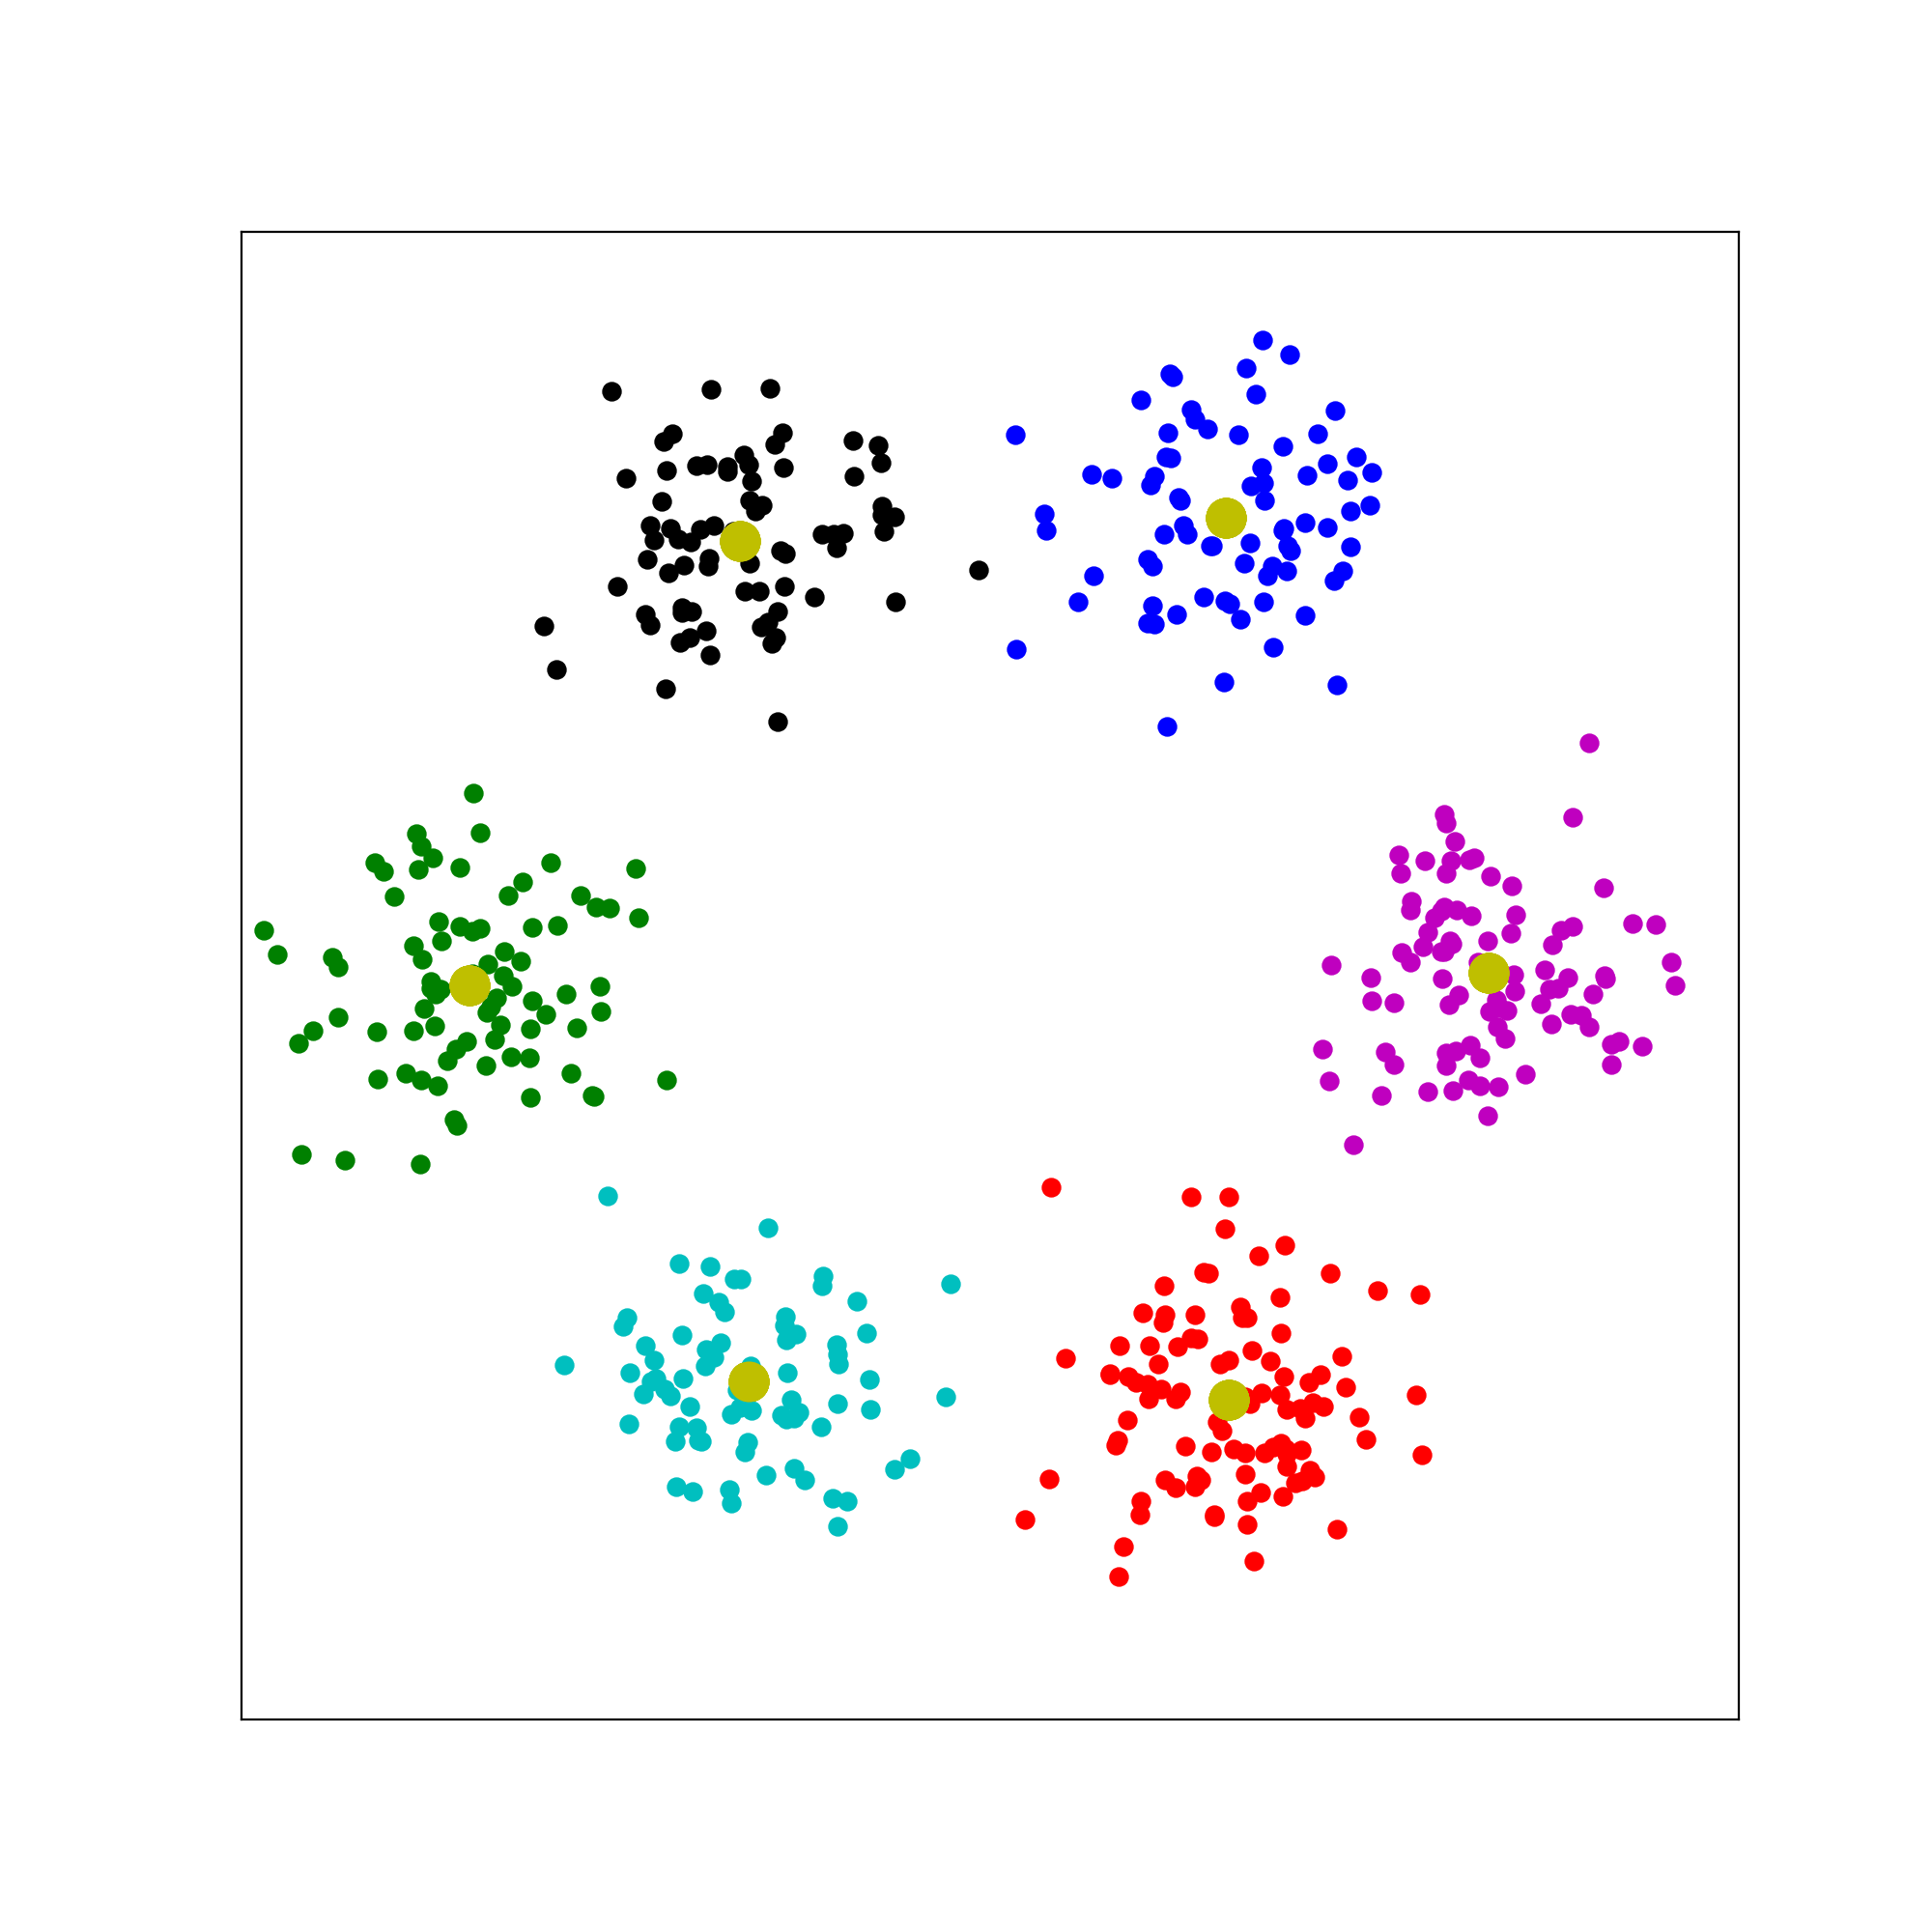

[]

In [89]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
colors = ['b', 'r', 'g', 'm', 'k', 'c', 'y']
for j in range(k):
    ax.scatter(X[c==j][:, 0], X[c==j][:, 1], c=colors[j], s=40)
    ax.scatter(m[:, 0], m[:, 1], c='y', s=200)
ax.set_xticks(())
ax.set_yticks(())

In [115]:
k = 8
tries = 5
X = generateData(2000, k=k)
k_vals = [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 16, 20]
costs = []
for kp in k_vals:
    w_min = np.Infinity
    for t in range(tries):
        _, _, _, w = kmeans(X, kp)
        if w < w_min: 
            w_min =w
    costs.append(w_min)

k = 2; t = 0, best w = 1192.04
k = 2; t = 1, best w = 1183.75
k = 2; t = 2, best w = 1183.75
k = 2; t = 3, best w = 1183.75
k = 2; t = 4, best w = 1183.75
k = 3; t = 0, best w = 655.55
k = 3; t = 1, best w = 655.55
k = 3; t = 2, best w = 655.55
k = 3; t = 3, best w = 655.55
k = 3; t = 4, best w = 655.55
k = 4; t = 0, best w = 349.91
k = 4; t = 1, best w = 349.91
k = 4; t = 2, best w = 349.91
k = 4; t = 3, best w = 349.91
k = 4; t = 4, best w = 349.91
k = 5; t = 0, best w = 285.14
k = 5; t = 1, best w = 271.67
k = 5; t = 2, best w = 271.67
k = 5; t = 3, best w = 271.67
k = 5; t = 4, best w = 271.67
k = 6; t = 0, best w = 198.46
k = 6; t = 1, best w = 198.46
k = 6; t = 2, best w = 198.46
k = 6; t = 3, best w = 198.46
k = 6; t = 4, best w = 198.46
k = 7; t = 0, best w = 203.17
k = 7; t = 1, best w = 132.65
k = 7; t = 2, best w = 132.65
k = 7; t = 3, best w = 132.65
k = 7; t = 4, best w = 132.65
k = 8; t = 0, best w = 124.07
k = 8; t = 1, best w = 124.07
k = 8; t = 2, best w = 62.13
k = 8;

[1183.7485609799237,
 655.55285435748556,
 349.90526270204055,
 271.66529133556219,
 198.46363717718046,
 132.65481085456852,
 62.131818540870071,
 58.943074512555732,
 56.447990647540252,
 52.21262964518764,
 41.423589684661493,
 34.547165764953625]

<IPython.core.display.Javascript object>


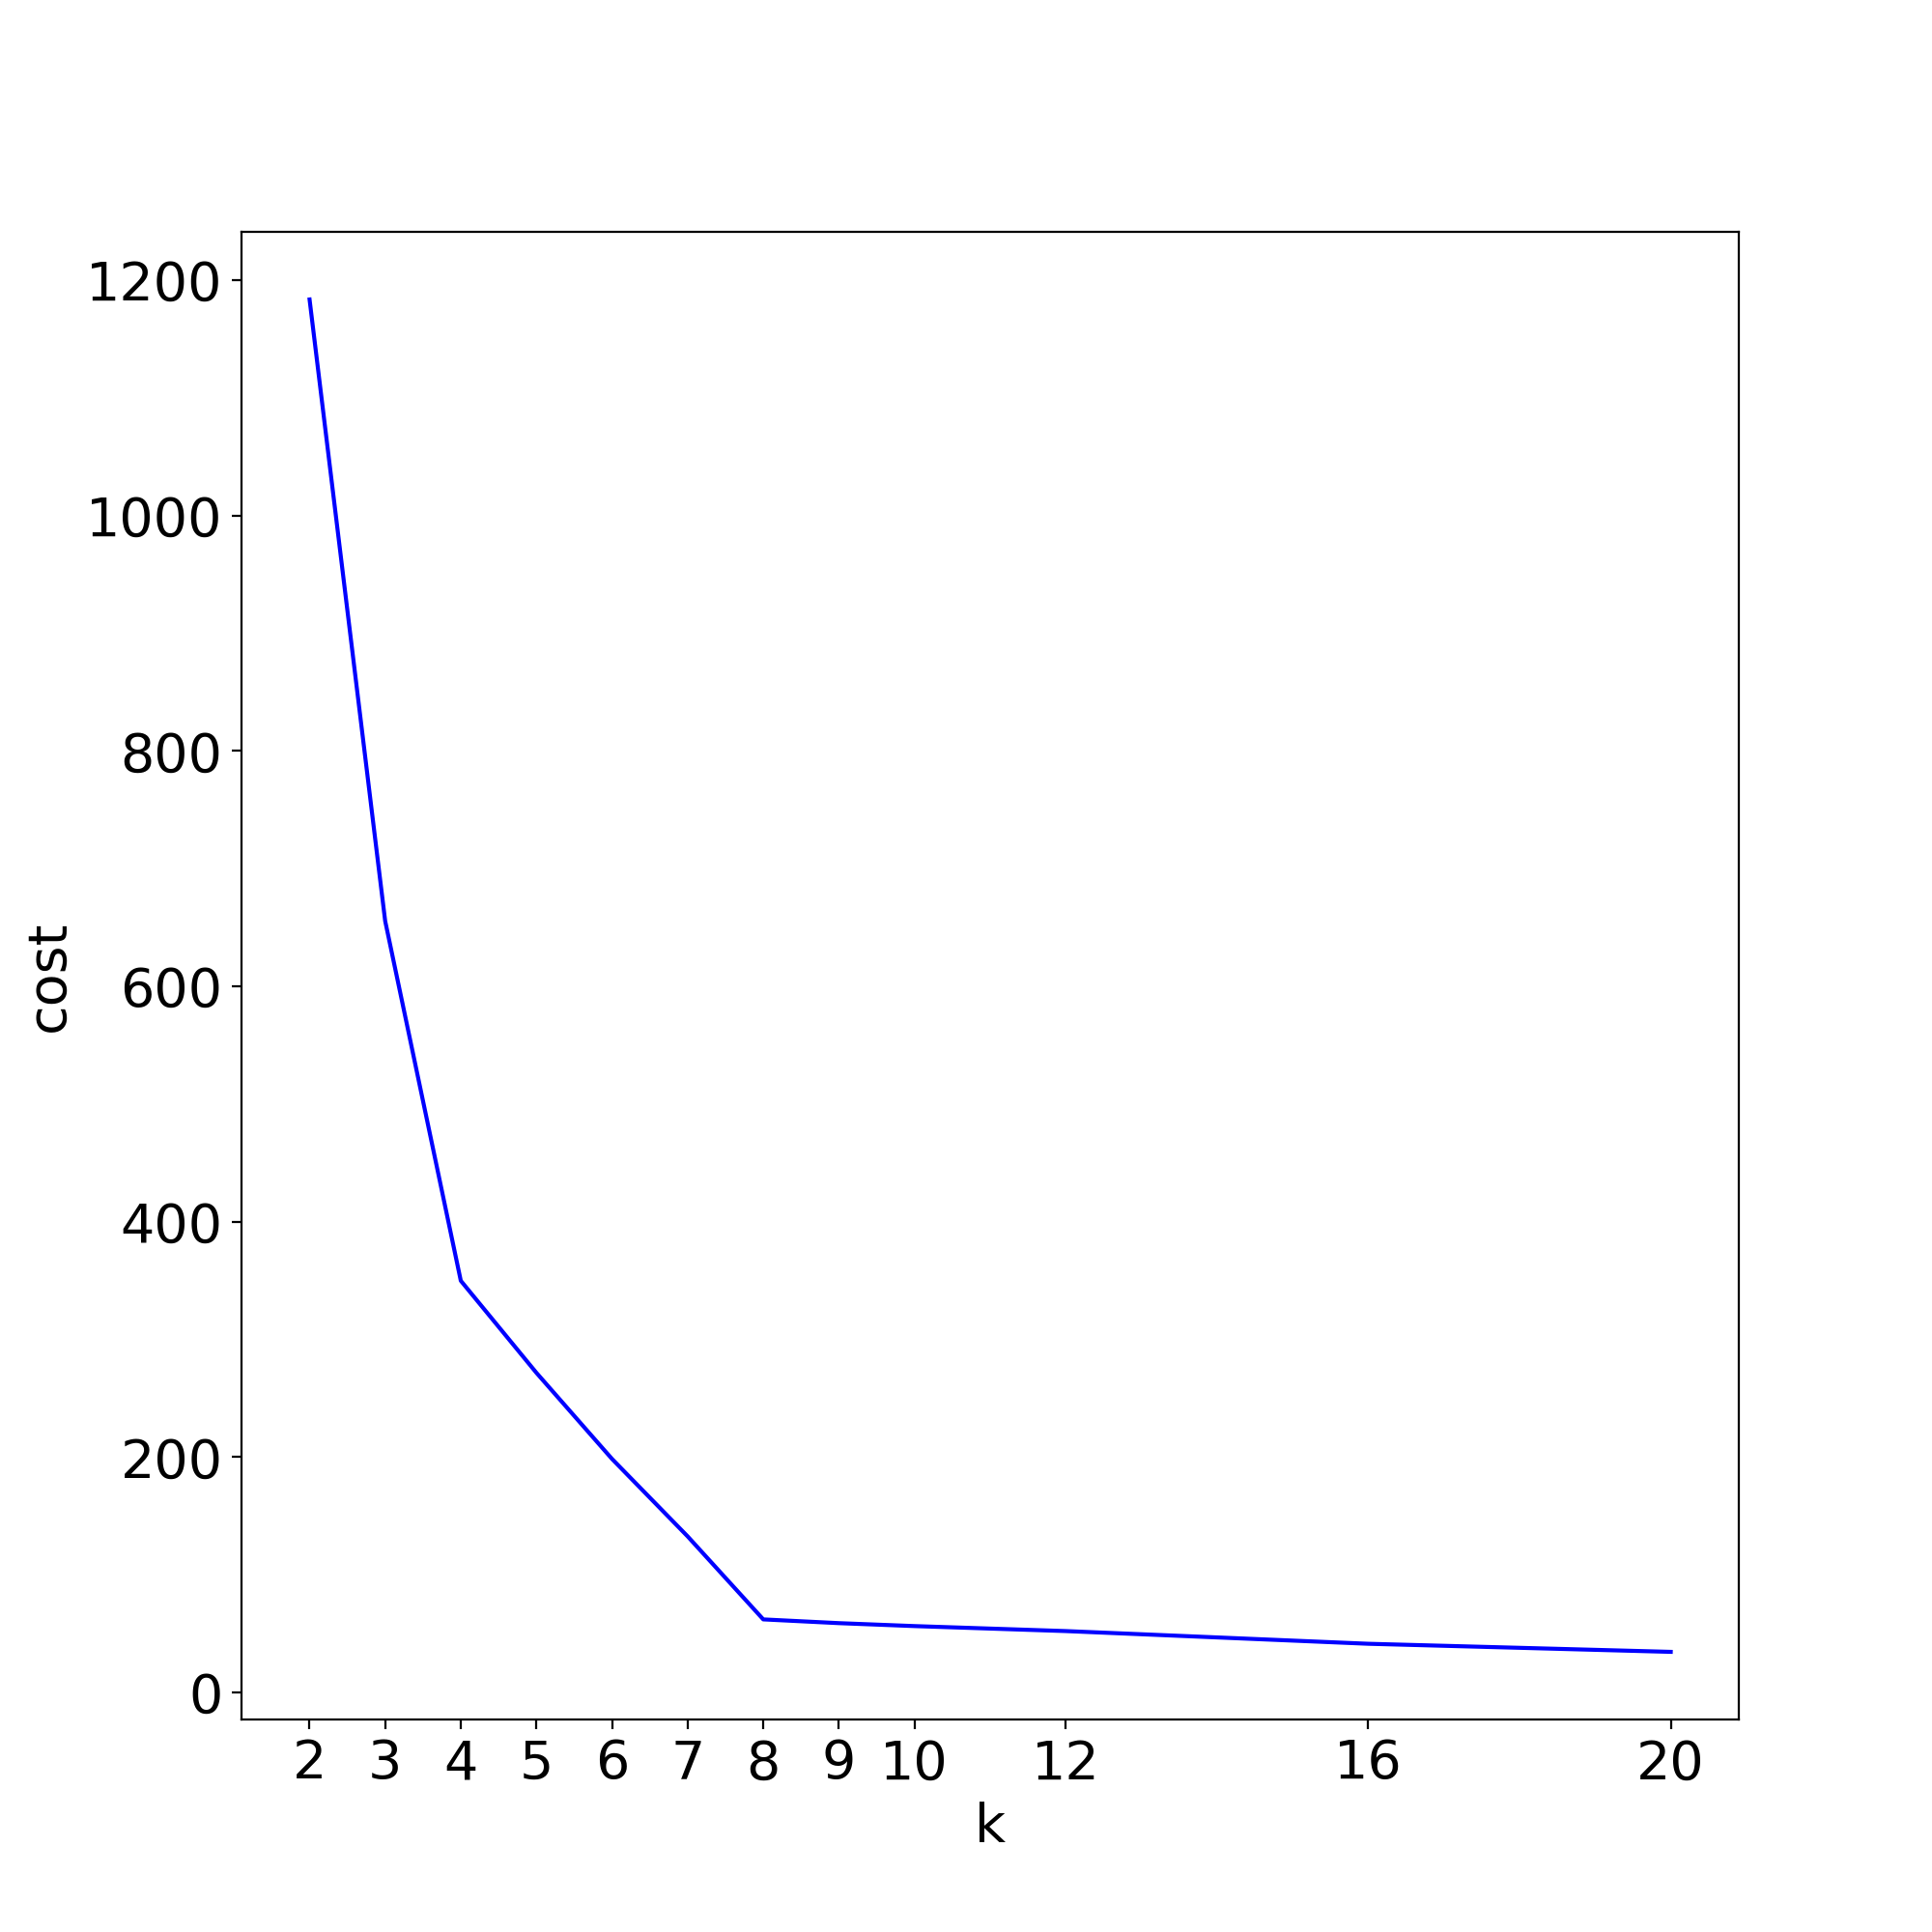

In [119]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_vals, costs, 'b')
ax.set_xticks([2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 16, 20])
ax.tick_params(labelsize=20)
ax.set_xlabel('k', fontsize=20)
ax.set_ylabel('cost', fontsize=20)

<IPython.core.display.Javascript object>


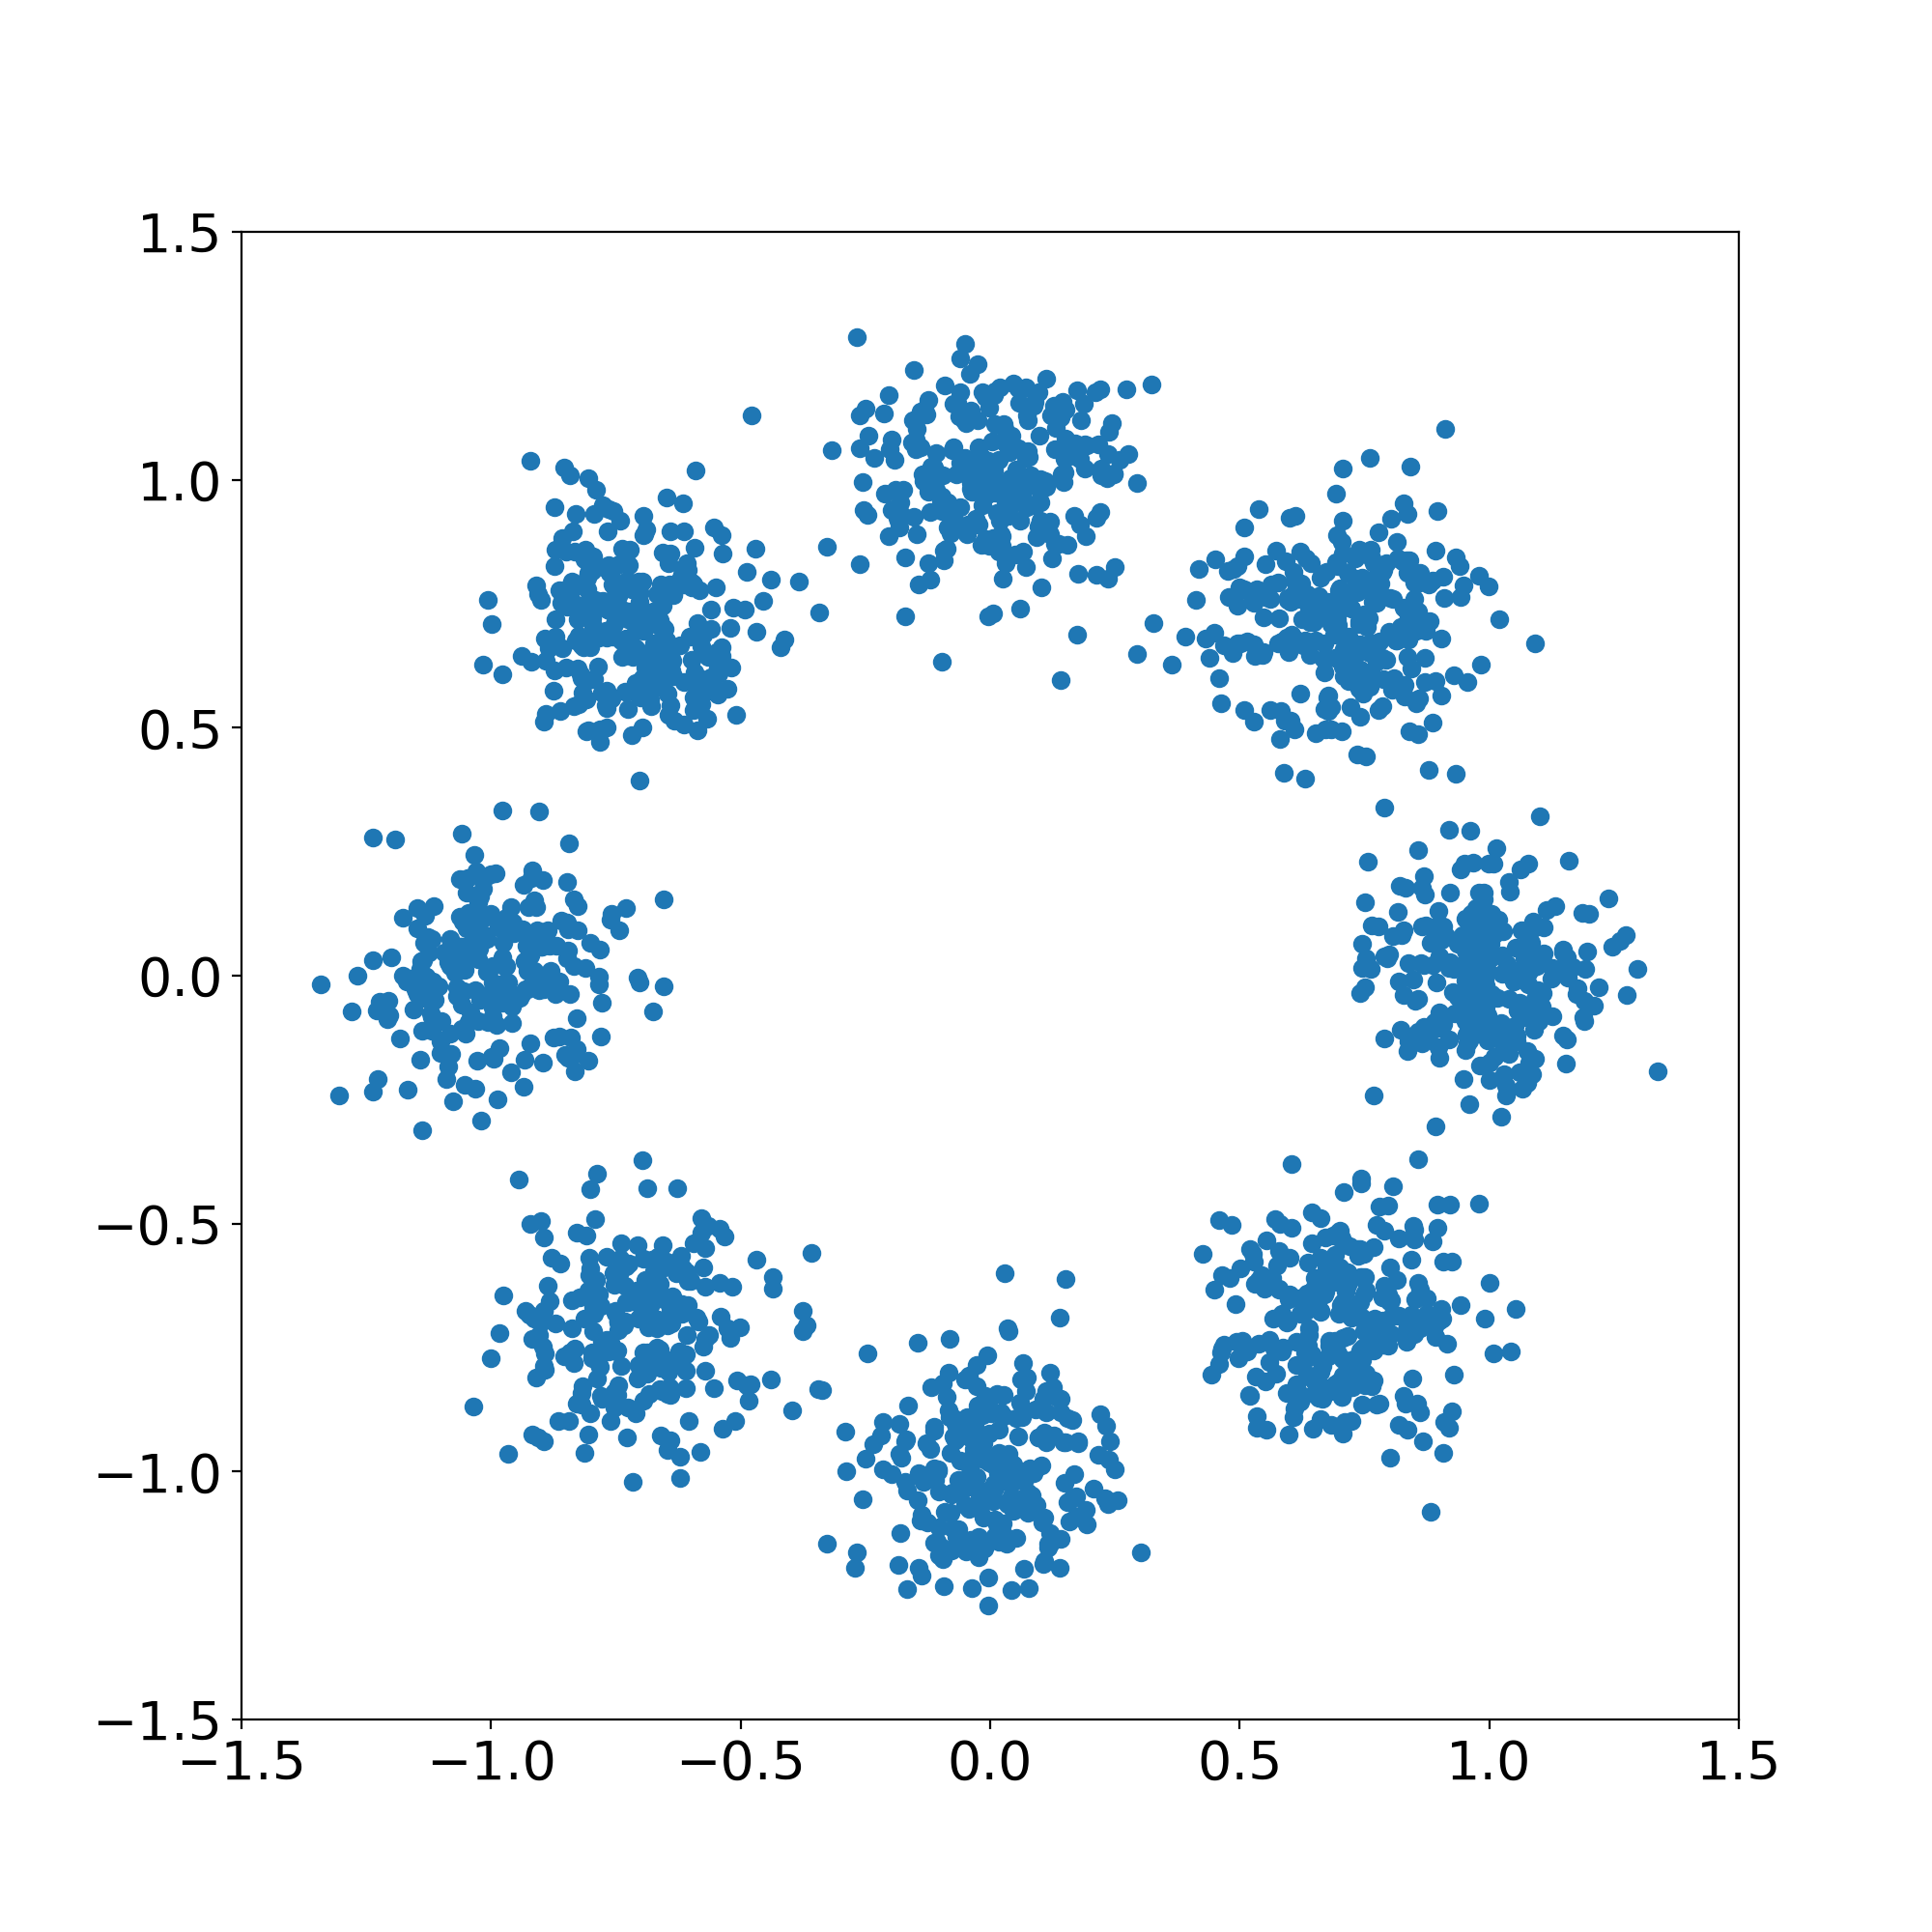

In [120]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.set_xlim(-1.5, 1.5)
ax2.set_ylim(-1.5, 1.5)
ax2.tick_params(labelsize=20)
ax2.scatter(X[:, 0], X[:, 1])